In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
file_list = drive.ListFile({'q': "'1_H-maiuG9bzIRPocVVuONmGaIw5KWUVp' in parents and trashed=false"}).GetList()
for file1 in file_list:
  f_holder = drive.CreateFile({'id': file1['id']})
  f_holder.GetContentFile(file1['title'])
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: loan_theme_ids.csv, id: 1IEkguTBV_nkWiVnkOMQQ_F_eCZFphETR
title: loan_themes_by_region.csv, id: 1MjzjJ2GoNE8sGNQObb4Lkm8gVjpfXthb
title: kiva_loans.csv, id: 1Sg463xEjvswu_YjVzZIRQBeVeGQiyarB
title: kiva_mpi_region_locations.csv, id: 1nle-bNa--Bd7eO61wQwU7_lketCjYorK


In [0]:
kiva_loans = pd.read_csv("kiva_loans.csv")
kiva_mpi_region_locations = pd.read_csv("kiva_mpi_region_locations.csv") 
loan_theme_ids = pd.read_csv("loan_theme_ids.csv") 
loan_themes_by_region = pd.read_csv("loan_themes_by_region.csv") 

In [6]:
kiva_loans["time_to_fund"] = (pd.to_datetime(kiva_loans.funded_time) - pd.to_datetime(kiva_loans.disbursed_time))
kiva_loans = kiva_loans.drop(['posted_time','loan_amount','use','tags','disbursed_time', 'funded_time', 'date', 'currency'], axis=1)
kiva_loans.head()

,id,funded_amount,activity,sector,country_code,country,region,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,time_to_fund
0,653051,300.0,Fruits & Vegetables,Food,PK,Pakistan,Lahore,247.0,12.0,12,female,irregular,16 days 02:06:32
1,653053,575.0,Rickshaw,Transportation,PK,Pakistan,Lahore,247.0,11.0,14,"female, female",irregular,16 days 01:17:23
2,653068,150.0,Transportation,Transportation,IN,India,Maynaguri,334.0,43.0,6,female,bullet,15 days 08:01:36
3,653063,200.0,Embroidery,Arts,PK,Pakistan,Lahore,247.0,11.0,8,female,irregular,8 days 05:00:00
4,653084,400.0,Milk Sales,Food,PK,Pakistan,Abdul Hakeem,245.0,14.0,16,female,monthly,15 days 11:18:51


In [7]:
kiva_mpi_region_locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [8]:
kiva_mpi_region_locations = kiva_mpi_region_locations.dropna(thresh=2);
kiva_mpi_region_locations = kiva_mpi_region_locations.drop(['LocationName', 'lat', 'lon'], axis=1);
kiva_mpi_region_locations.head()

,ISO,country,region,world_region,MPI,geo
0,AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)"
1,AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)"
2,AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)"
3,AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)"
4,AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)"


In [9]:
loan_theme_ids.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [0]:
loan_themes_by_region.columns
loan_themes_by_region = loan_themes_by_region.drop(['Field Partner Name', 'sector', 'LocationName', 'lat', 'lon', 'names','mpi_region', 'geocode_old', 'geocode', 'mpi_geo'], axis=1)

In [11]:
loan_themes_by_region.head()

,Partner ID,Loan Theme ID,Loan Theme Type,country,forkiva,region,ISO,number,amount,geo,rural_pct
0,9,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,KHM,1,450,"(13.6672596, 102.8975098)",90.0
1,9,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,KHM,58,20275,"(13.0286971, 102.989615)",90.0
2,9,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,KHM,7,9150,"(13.0286971, 102.989615)",90.0
3,9,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,KHM,1383,604950,"(12.0982918, 105.3131185)",90.0
4,9,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,KHM,3,275,"(12.0982918, 105.3131185)",90.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


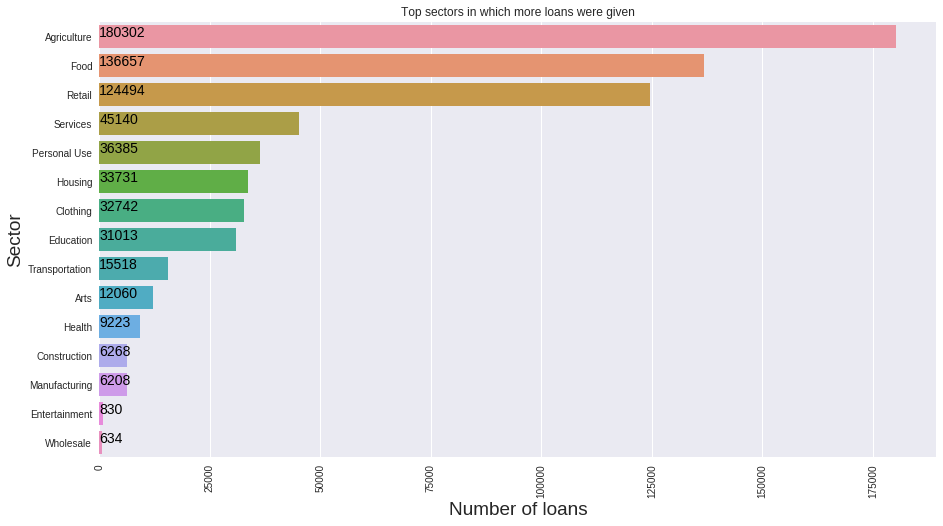

In [21]:
plt.figure(figsize=(15,8))
sector_name = kiva_loans['sector'].value_counts()
sns.barplot(sector_name.values, sector_name.index)
for i, v in enumerate(sector_name.values):
    plt.text(0.5,i,v,color='k',fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Number of loans', fontsize=19)
plt.ylabel('Sector', fontsize=19)
plt.title("Top sectors in which more loans were given")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Most frequent countries for kiva loan')

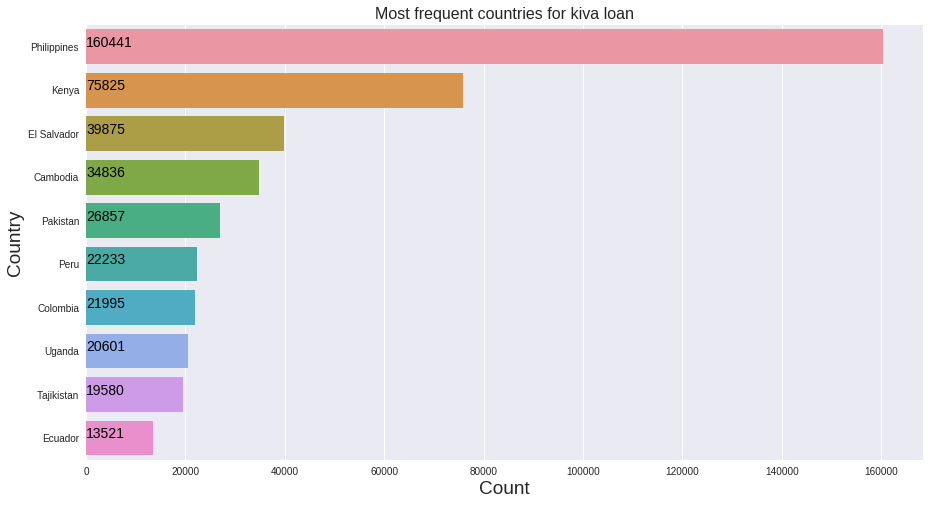

In [26]:
plt.figure(figsize=(15,8))
count = kiva_loans['country'].value_counts().head(10)
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.6,i,v,color='k',fontsize=14)
plt.xlabel('Count', fontsize=19)
plt.ylabel('Country', fontsize=19)
plt.title("Most frequent countries for kiva loan", fontsize=16)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Top Loan Activity type')

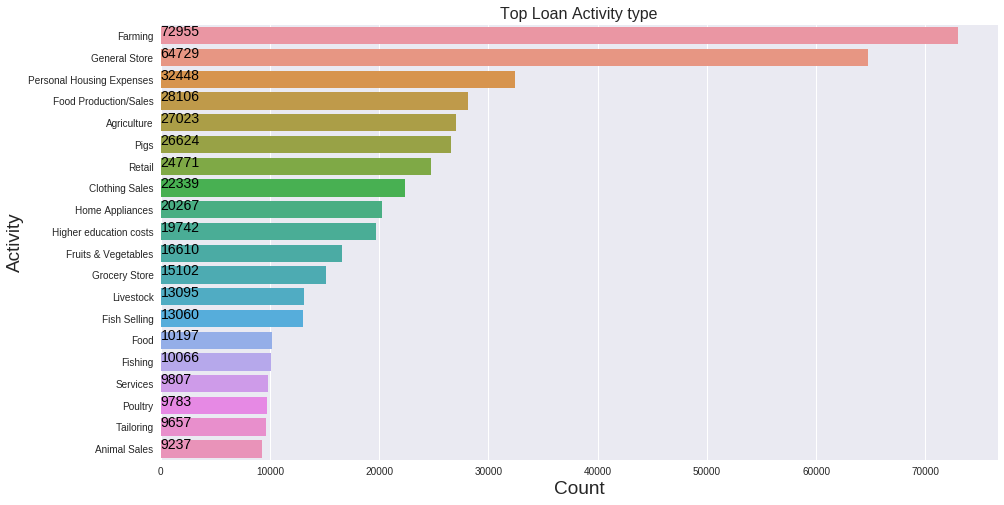

In [27]:
plt.figure(figsize=(15,8))
count = kiva_loans['activity'].value_counts().head(20)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Count', fontsize=19)
plt.ylabel('Activity', fontsize=19)
plt.title("Top Loan Activity type", fontsize=16)

In [32]:
sector_repayment = ['country', 'repayment_interval']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(kiva_loans[sector_repayment[0]], kiva_loans[sector_repayment[1]]).style.background_gradient(cmap = cm)

repayment_interval,bullet,irregular,monthly,weekly
country,,,,
Afghanistan,2,0,0,0
Albania,23,26,1885,0
Armenia,43,170,8418,0
Azerbaijan,0,12,1933,0
Belize,0,0,125,0
Benin,1,40,456,0
Bhutan,0,2,0,0
Bolivia,39,1231,7536,0
Brazil,14,181,89,0


In [0]:
kenya_loans = kiva_loans[(kiva_loans['country']=="Kenya") | (kiva_loans['country_code']=="KE")]

In [35]:
# # kenya_loans.describe()
# kenya_loans.columns
for i in set(kenya_loans.region):
  print(i)

nan
Tijara
Mwembe Tayari, Mombasa
Kisii
Majaoni, Mombasa
Aldina,Jomvu
Huruma
Machakos
East Nairobi
Mtopanga; Mombasa
kakamega south
Awendo
Lunga Lunga
Kauma
Nguluni;Tala
Kangemi
Koyango Manyatta-kisumu
ELDAMA RAVINE
Kombewa
karatina
Shirere Kakamega
Kapture, Kapsabet
Mwahera
Muhoroni
litein
Balozi, Nairobi
Thika
Engineer
Matete-
North Butsotso-kakamega
Tudor, Mombasa
Mavueni
Baba Dogo
Aldina,Jomvu Kenya
Nunguni
mamboleo Kisumu
Masavoni
Chaani, Mombasa
Katito
Mikinduri
Uthiru
KAMALIL, NANDI
Kibera
Mariani
Mombasa
Mtongwe, Mombasa
Kabartonjo, Baringo county
Kagujo
Kangemi,Nairobi
Kisumu
Ngerenya
Kayaba, Nairobi
Kiwa Island
Ganze
Nkoilale
Usenge Town
Homeage
Lucky Rhino
Msambweni
Kapsabet
Manyatta Kisumu
Vihiga
KYAMBEKE
Eastland
Kuria west
Nyandarua South
Dagoretti
Ndunyu Njeru
Viwandani
Kitale
Shika Adabu Likoni Mombasa
Kiserian;Nairobi
Bamburi, Mombasa
Maweni;Malindi
Siaya
Furunzi;Malindi
Kisauni
Majengo Kakamega
Saika,Nairobi
Kuria East
Moi's Bridge
Bungoma
Kangundo
Eastleigh, Nairobi
